In [25]:
import pandas as pd
import numpy as np

In [37]:
titanic = pd.read_csv(r'C:\Users\YESHWANTH\titanic dataset.csv')
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [39]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [41]:
del titanic["Name"]

In [43]:
del titanic["Ticket"]
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,71.2833,C85,C
2,3,1,3,female,26.0,0,0,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,53.1000,C123,S
4,5,0,3,male,35.0,0,0,8.0500,NaN,S


In [45]:
del titanic["Fare"]
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked
0,1,0,3,male,22.0,1,0,NaN,S
1,2,1,1,female,38.0,1,0,C85,C
2,3,1,3,female,26.0,0,0,NaN,S
3,4,1,1,female,35.0,1,0,C123,S
4,5,0,3,male,35.0,0,0,NaN,S


In [47]:
del titanic['Cabin']
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,male,22.0,1,0,S
1,2,1,1,female,38.0,1,0,C
2,3,1,3,female,26.0,0,0,S
3,4,1,1,female,35.0,1,0,S
4,5,0,3,male,35.0,0,0,S


In [49]:
# Changing Value for "Male, Female" string values to numeric values , male=1 and female=2
def getNumber(str):
    if str=="male":
        return 1
    else:
        return 2
titanic["Gender"]=titanic["Sex"].apply(getNumber)
#We have created a new column called "Gender" and 
#filling it with values 1,2 based on the values of sex column
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Gender
0,1,0,3,male,22.0,1,0,S,1
1,2,1,1,female,38.0,1,0,C,2
2,3,1,3,female,26.0,0,0,S,2
3,4,1,1,female,35.0,1,0,S,2
4,5,0,3,male,35.0,0,0,S,1


In [51]:
#Deleting Sex column, since no use of it now
del titanic["Sex"]
titanic.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Embarked,Gender
0,1,0,3,22.0,1,0,S,1
1,2,1,1,38.0,1,0,C,2
2,3,1,3,26.0,0,0,S,2
3,4,1,1,35.0,1,0,S,2
4,5,0,3,35.0,0,0,S,1


In [61]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Age            177
SibSp            0
Parch            0
Embarked         2
Gender           0
dtype: int64

In [65]:
meanS= titanic[titanic.Survived==1].Age.mean()
meanS

28.343689655172415

In [67]:
titanic["age"]=np.where(pd.isnull(titanic.Age) & titanic["Survived"]==1  ,meanS, titanic["Age"])
titanic.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Embarked,Gender,age
0,1,0,3,22.0,1,0,S,1,22.0
1,2,1,1,38.0,1,0,C,2,38.0
2,3,1,3,26.0,0,0,S,2,26.0
3,4,1,1,35.0,1,0,S,2,35.0
4,5,0,3,35.0,0,0,S,1,35.0


In [69]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Age            177
SibSp            0
Parch            0
Embarked         2
Gender           0
age            125
dtype: int64

In [77]:
meanNS= titanic[titanic.Survived==0].Age.mean()
meanS

30.62617924528302

In [81]:
titanic.age.fillna(meanNS,inplace=True)
titanic.head()

C:\Users\YESHWANTH\AppData\Local\Temp\ipykernel_11932\1157731433.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic.age.fillna(meanNS,inplace=True)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Embarked,Gender,age
0,1,0,3,22.0,1,0,S,1,22.0
1,2,1,1,38.0,1,0,C,2,38.0
2,3,1,3,26.0,0,0,S,2,26.0
3,4,1,1,35.0,1,0,S,2,35.0
4,5,0,3,35.0,0,0,S,1,35.0


In [83]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Age            177
SibSp            0
Parch            0
Embarked         2
Gender           0
age              0
dtype: int64

In [85]:
del titanic['Age']
titanic.head()

,PassengerId,Survived,Pclass,SibSp,Parch,Embarked,Gender,age
0,1,0,3,1,0,S,1,22.0
1,2,1,1,1,0,C,2,38.0
2,3,1,3,0,0,S,2,26.0
3,4,1,1,1,0,S,2,35.0
4,5,0,3,0,0,S,1,35.0


In [87]:
# Finding the number of people who have survived 
# given that they have embarked or boarded from a particular port

survivedQ = titanic[titanic.Embarked == 'Q'][titanic.Survived == 1].shape[0]
survivedC = titanic[titanic.Embarked == 'C'][titanic.Survived == 1].shape[0]
survivedS = titanic[titanic.Embarked == 'S'][titanic.Survived == 1].shape[0]
print(survivedQ)
print(survivedC)
print(survivedS)

30
93
217


C:\Users\YESHWANTH\AppData\Local\Temp\ipykernel_11932\3300902897.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  survivedQ = titanic[titanic.Embarked == 'Q'][titanic.Survived == 1].shape[0]
C:\Users\YESHWANTH\AppData\Local\Temp\ipykernel_11932\3300902897.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  survivedC = titanic[titanic.Embarked == 'C'][titanic.Survived == 1].shape[0]
C:\Users\YESHWANTH\AppData\Local\Temp\ipykernel_11932\3300902897.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  survivedS = titanic[titanic.Embarked == 'S'][titanic.Survived == 1].shape[0]


In [89]:
titanic.dropna(inplace=True)
titanic.head()

,PassengerId,Survived,Pclass,SibSp,Parch,Embarked,Gender,age
0,1,0,3,1,0,S,1,22.0
1,2,1,1,1,0,C,2,38.0
2,3,1,3,0,0,S,2,26.0
3,4,1,1,1,0,S,2,35.0
4,5,0,3,0,0,S,1,35.0


In [91]:
#Renaming "age" and "gender" columns
titanic.rename(columns={'age':'Age'}, inplace=True)
titanic.head()

,PassengerId,Survived,Pclass,SibSp,Parch,Embarked,Gender,Age
0,1,0,3,1,0,S,1,22.0
1,2,1,1,1,0,C,2,38.0
2,3,1,3,0,0,S,2,26.0
3,4,1,1,1,0,S,2,35.0
4,5,0,3,0,0,S,1,35.0


In [93]:
titanic.rename(columns={'Gender':'Sex'}, inplace=True)
titanic.head()

,PassengerId,Survived,Pclass,SibSp,Parch,Embarked,Sex,Age
0,1,0,3,1,0,S,1,22.0
1,2,1,1,1,0,C,2,38.0
2,3,1,3,0,0,S,2,26.0
3,4,1,1,1,0,S,2,35.0
4,5,0,3,0,0,S,1,35.0


In [95]:
def getEmb(str):
    if str=="S":
        return 1
    elif str=='Q':
        return 2
    else:
        return 3
titanic["Embark"]=titanic["Embarked"].apply(getEmb)
titanic.head()

,PassengerId,Survived,Pclass,SibSp,Parch,Embarked,Sex,Age,Embark
0,1,0,3,1,0,S,1,22.0,1
1,2,1,1,1,0,C,2,38.0,3
2,3,1,3,0,0,S,2,26.0,1
3,4,1,1,1,0,S,2,35.0,1
4,5,0,3,0,0,S,1,35.0,1


577
312


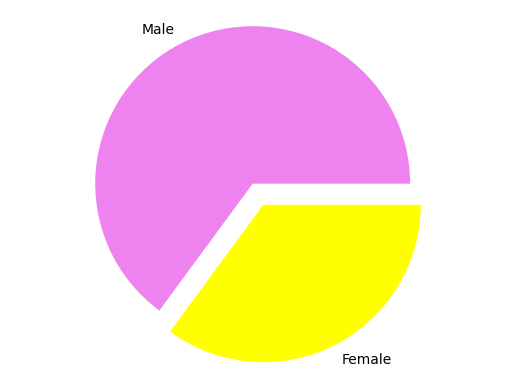

In [129]:
#Drawing a pie chart for number of males and females aboard
import matplotlib.pyplot as plt
from matplotlib import style

males = (titanic['Sex'] == 1).sum() 
#Summing up all the values of column gender with a 
#condition for male and similary for females
females = (titanic['Sex'] == 2).sum()
print(males)
print(females)
p = [males, females]
plt.pie(p,    #giving array
       labels = ['Male', 'Female'], #Correspndingly giving labels
       colors = ['violet', 'yellow'],   # Corresponding colors
       explode = (0.15, 0),    #How much the gap should me there between the pies
       startangle = 0)  #what start angle should be given
plt.axis('equal') 
plt.show()

In [101]:
# More Precise Pie Chart
MaleS=titanic[titanic.Sex==1][titanic.Survived==1].shape[0]
print(MaleS)
MaleN=titanic[titanic.Sex==1][titanic.Survived==0].shape[0]
print(MaleN)
FemaleS=titanic[titanic.Sex==2][titanic.Survived==1].shape[0]
print(FemaleS)
FemaleN=titanic[titanic.Sex==2][titanic.Survived==0].shape[0]
print(FemaleN)

109
468
231
81


C:\Users\YESHWANTH\AppData\Local\Temp\ipykernel_11932\3105620411.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MaleS=titanic[titanic.Sex==1][titanic.Survived==1].shape[0]
C:\Users\YESHWANTH\AppData\Local\Temp\ipykernel_11932\3105620411.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MaleN=titanic[titanic.Sex==1][titanic.Survived==0].shape[0]
C:\Users\YESHWANTH\AppData\Local\Temp\ipykernel_11932\3105620411.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  FemaleS=titanic[titanic.Sex==2][titanic.Survived==1].shape[0]
C:\Users\YESHWANTH\AppData\Local\Temp\ipykernel_11932\3105620411.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  FemaleN=titanic[titanic.Sex==2][titanic.Survived==0].shape[0]


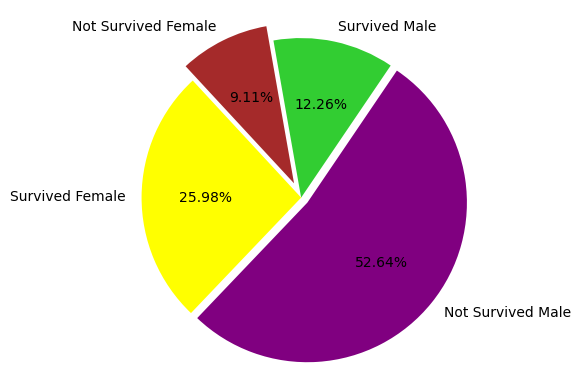

In [125]:
chart=[MaleS,MaleN,FemaleS,FemaleN]
colors=['limegreen','purple','Yellow','brown']
labels=["Survived Male","Not Survived Male","Survived Female","Not Survived Female"]
explode=[0,0.05,0,0.1]
plt.pie(chart,labels=labels,colors=colors,explode=explode,startangle=100,counterclock=False,autopct="%.2f%%")
plt.axis("equal")
plt.show()